In [1]:
using Plots
using TimeIt
using KernelDensity
using Distributions
include("HMC_logistic.jl")
include("BPS.jl")
include("NRG.jl") 

NRG_ss_fixed_attempts (generic function with 5 methods)

In [13]:
d, Nobs = 20, 10^3
c = 0.5
β_true = -ones(d)/2
α_true = simulate_α(c, Nobs)
X = rand(d, Nobs)
y = [rand(1)[1] < 1/(1 + exp(-α_true[i]-dot(β_true,X[:,i]))) for i in 1:Nobs] .+ 0
mean(y)

0.014

### HMC:

In [14]:
model = Model([X; reshape(y, 1, Nobs)]);

In [19]:
σ_α, σ_β = 2, 2 
L = 10
δ = 0.01
dim = d + Nobs;

#### No mass matrix:

2.83 minutes to run 
0.564 acceptance rate 
210000000 partial derivate evaluations evaluations 


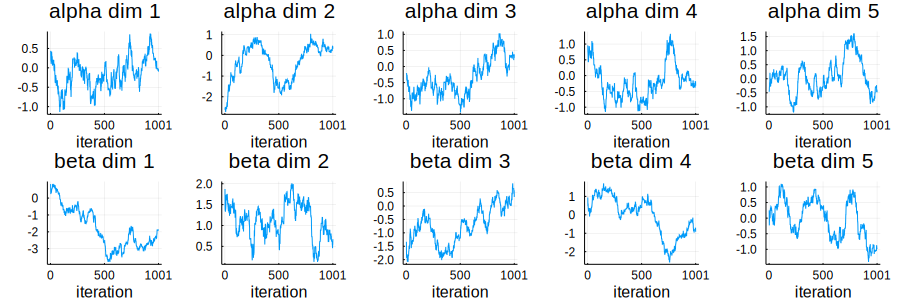

In [21]:
T = 10^3
start = time()
chain, accepted = HMC_basic(model, L, δ, T, dim) 
print( round((time()-start)/60, 2), " minutes to run \n")
print(accepted/T, " acceptance rate \n")
print(T*L*(Nobs + d*Nobs), " partial derivate evaluations evaluations \n")
plot_traj(chain, Nobs)

In [22]:
size(chain)

(1020, 1001)

### NRG:

In [26]:
α_0, β_0 = copy(α_true), copy(β_true)
max_times = [ones(Nobs); 1.5*ones(d)]
mb_size = 1
modprint = 500
include_α , replace, Print= true, false, true;

16.19 minutes to run 
22.7% of bounces accepted 
3.1989938e7 partial derivative evaluations

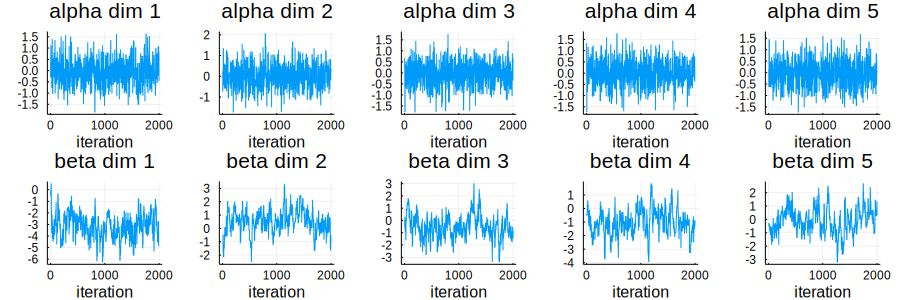

In [27]:
start = time()
ξ_traj, abounce_counter, bounce_counter = NRG_ss(X, y, 10^6, max_times, α_0, β_0, mb_size, 
                                                 c, σ_α, σ_β, modprint, include_α, replace)  
print( round((time()-start)/60, 2), " minutes to run \n")
print(round(100*mean(bounce_counter./abounce_counter),1), "% of bounces accepted \n")
print(sum(abounce_counter), " partial derivative evaluations")
plot_traj(ξ_traj, Nobs)

In [29]:
T*L*(Nobs + d*Nobs)/sum(abounce_counter)

6.564564145138387

#### Plot kernel density estimates to assess correctness:

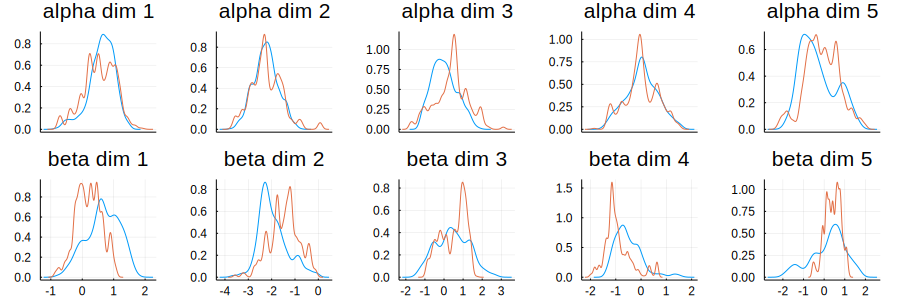

In [42]:
plot_kde(chain, ξ_traj, Nobs)

#### Add a mass matrix to HMC: